In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import verde as vd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

/home/badr/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/badr/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),name,cumulative production
0,66100.0,22300.0,0.09,0.033,0.332,9440769.483,0.124740,0.875260,260036.414279,275.737593,Tarragon 4-119H,81324.0
1,66199.0,22300.0,0.12,0.057,0.332,9429043.880,0.124979,0.875021,NaN,NaN,Tarragon 4-119H,81324.0
2,66297.0,22300.0,0.11,0.050,0.332,9417413.010,0.125221,0.874779,429740.754787,324.145032,Tarragon 4-119H,81324.0
3,66396.0,22300.0,0.08,0.024,0.332,9405879.454,0.125469,0.874531,NaN,NaN,Tarragon 4-119H,81324.0
4,66495.0,22300.0,0.08,0.031,0.332,9394445.773,0.125720,0.874280,485657.822229,320.868488,Tarragon 4-119H,81324.0


In [3]:
def mse_verde(model, test_x, test_y):
    predictions = model.predict((test_x['easting'], test_x['northing']))
    variance = np.var(test_y.values)
    mse = mean_squared_error(test_y.values, predictions)
    
    print(variance, mse)
    
    return mse

In [4]:
def model_porosity(test=True):
    features = data[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio', 'porosity']].dropna()
    x = features[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio']]
    y = features['porosity']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    if test == False:
        train_x = x
        train_y = y
    
    model = GradientBoostingRegressor()
    model.fit(train_x, train_y)
    
    if test == True:
        print('Porosity Score', model.score(test_x, test_y))
    
    return model

In [5]:
def model_permeability(test=True):
    features = data[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio', 'permeability']].dropna()
    x = features[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio']]
    y = features['permeability']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    if test == False:
        train_x = x
        train_y = y
    
    model = GradientBoostingRegressor()
    model.fit(train_x, train_y)
    
    if test == True:
        print('Permeability Score', model.score(test_x, test_y))
    
    return model

In [6]:
def model_youngs(test=True):
    features = data[['easting', 'northing', 'Young\'s Modulus']].dropna()
    x = features[['easting', 'northing']]
    y = features['Young\'s Modulus']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    if test == False:
        train_x = x
        train_y = y
    
    model = vd.Spline()
    model.fit((train_x['easting'], train_x['northing']), train_y)
    
    if test == True:
        score = model.score((test_x['easting'], test_x['northing']), test_y)
        print('Young\'s Modulus Score', score)
    
    return model

In [7]:
def model_oil(test=True):
    features = data[['easting', 'northing', 'oil saturation']].dropna()
    x = features[['easting', 'northing']]
    y = features['oil saturation']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)  
    
    if test == False:
        train_x = x
        train_y = y
    
    model = vd.Spline()
    model.fit((train_x['easting'], train_x['northing']), train_y)
    
    if test == True:
        score = model.score((test_x['easting'], test_x['northing']), test_y)
        print('Oil saturation Score', score)
    
    return model

In [8]:
def model_poissons(test=True):
    features = data[['easting', 'northing', 'Poisson\'s ratio']].dropna()
    x = features[['easting', 'northing']]
    y = features['Poisson\'s ratio']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    if test == False:
        train_x = x
        train_y = y
    
    model = vd.Spline()
    model.fit((train_x['easting'], train_x['northing']), train_y)
    
    if test == True:
        score = model.score((test_x['easting'], test_x['northing']), test_y)
        print('Poisson\'s Ratio Score', score)
    
    return model

In [9]:
def model_cumulative_production(test=True):
    features = data[['porosity', 'permeability', 'Poisson\'s ratio', 'Young\'s Modulus', 'oil saturation', 'cumulative production']].dropna()
    x = data[['porosity', 'permeability', 'Poisson\'s ratio', 'Young\'s Modulus', 'oil saturation']]
    y = data[['cumulative production']]
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    if test == False:
        train_x = x
        train_y = y
    
    model = RandomForestRegressor(criterion='mae', n_estimators=300)
    model.fit(train_x, train_y)
    
    if test == True:
        print('Cumulative Production Score', model.score(test_x, test_y))
    
    return model

In [10]:
def predict_and_plot(model, feature, precision=500):
    easting = data['easting']
    northing = data['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    input_array = []

    print(x.shape, y.shape)
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            input_array.append((x[i], y[j]))

    predictions = model.predict(input_array)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T, vmin=data[feature].min(), vmax=data[feature].max())
    plt.colorbar()

In [11]:
def predict_and_plot_verde(spline, feature, spacing=100):
    easting = data['easting']
    northing = data['northing']
    
    grid_coords = vd.grid_coordinates(region=(easting.min(), easting.max(), northing.min(), northing.max()), spacing=spacing)
    gridded_scalars = spline.predict(grid_coords)

    plt.figure()
    plt.title(feature)
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(grid_coords[0], grid_coords[1], gridded_scalars)
    plt.colorbar()
    plt.show()

In [12]:
def predict_and_plot_second_layer(model, feature, poissons, youngs, oil, precision=500):
    predictors = data[['easting', 'northing']].dropna()
    easting = predictors['easting']
    northing = predictors['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    input_array = []

    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            coords = (x[i], y[j])
            poissons_pred = poissons.predict(coords)
            youngs_pred = youngs.predict(coords)
            oil_pred = oil.predict(coords)
            input_array.append((x[i], y[j], poissons_pred, youngs_pred, oil_pred))
    
    predictions = model.predict(input_array)
    
    plt.title(feature)
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T, vmin=data[feature].min(), vmax=data[feature].max())
    plt.colorbar()

In [13]:
def predict_and_plot_third_layer(model, feature, poissons, youngs, oil, porosity, permeability, precision=500):
    predictors = data[['easting', 'northing']].dropna()
    easting = predictors['easting']
    northing = predictors['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    coords = []
    input_array = []

    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            zeroth_to_first = (x[i], y[j])
            poissons_pred = poissons.predict(zeroth_to_first)
            youngs_pred = youngs.predict(zeroth_to_first)
            oil_pred = oil.predict(zeroth_to_first)
            coords.append(zeroth_to_first)
            
            first_to_second = np.array((x[i], y[j], poissons_pred, youngs_pred, oil_pred)).reshape(1, -1)
            porosity_pred = porosity.predict(first_to_second)
            permeability_pred = permeability.predict(first_to_second)
            
            second_to_third = (porosity_pred, permeability_pred, poissons_pred, youngs_pred, oil_pred)
            input_array.append(second_to_third)
    
    predictions = model.predict(input_array)
    values = np.array([coords, input_array, predictions]).T
    values = sorted(values, key=lambda x: x[-1], reverse=True)
    
    plt.title(feature)
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T)
    plt.colorbar()
    
    return values

Poisson's Ratio model has a score of ~1. Young's Modulus model has a score of ~1. Oil saturation model has a score of ~1. Porosity model has a score of ~0.704. Permeability model has a score of ~0.654. Cumulative production model has a score of ~0.873, basing its predictions ~10% on porosity, ~14% on permeability, ~25% on Poisson's Ratio, ~25% on Young's Modulus, and ~25% on oil saturation. This gives a cumulative score of ~0.80 for the entire model pipeline.

In [14]:
poissons_model = model_poissons()
youngs_model = model_youngs()
oil_model = model_oil()

porosity_model = model_porosity()
permeability_model = model_permeability()

cumulative_production_model = model_cumulative_production()

Poisson's Ratio Score 0.9996351173710125
Young's Modulus Score 0.999983379155892
Oil saturation Score 0.9999916751157051
Porosity Score 0.7043443288905558
Permeability Score 0.6548875949991122


/home/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Cumulative Production Score 0.8759563399960779


Once models are validated and fine-tuned, train on the entire dataset

In [15]:
poissons_model = model_poissons(False)
youngs_model = model_youngs(False)
oil_model = model_oil(False)

porosity_model = model_porosity(False)
permeability_model = model_permeability(False)

cumulative_production_model = model_cumulative_production(False)

/home/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


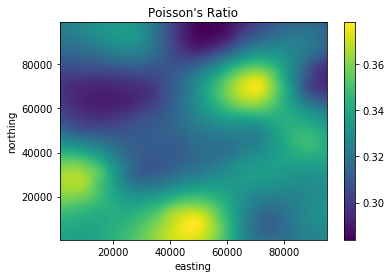

In [16]:
predict_and_plot_verde(poissons_model, 'Poisson\'s Ratio')

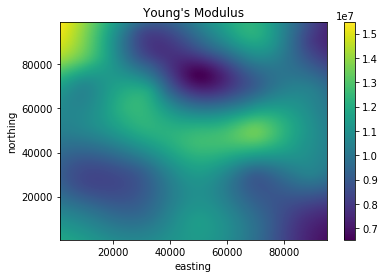

In [17]:
predict_and_plot_verde(youngs_model, 'Young\'s Modulus')

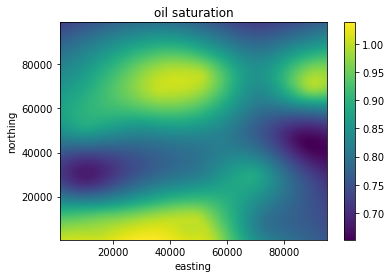

In [18]:
predict_and_plot_verde(oil_model, 'oil saturation')

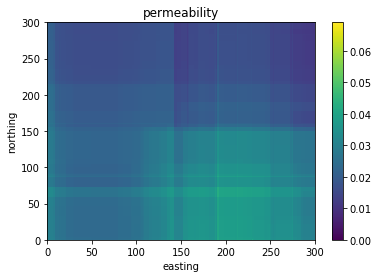

In [19]:
predict_and_plot_second_layer(permeability_model, 'permeability', poissons_model, youngs_model, oil_model, precision=300)

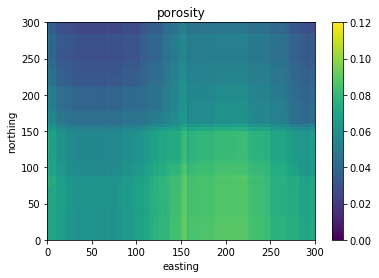

In [20]:
predict_and_plot_second_layer(porosity_model, 'porosity', poissons_model, youngs_model, oil_model, precision=300)

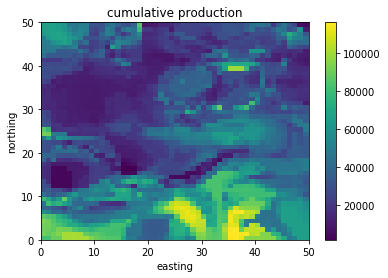

In [21]:
values = predict_and_plot_third_layer(cumulative_production_model, 'cumulative production', poissons_model, youngs_model, oil_model, porosity_model, permeability_model, precision=50)

In [22]:
prospective_sites = pd.DataFrame()

easting = []
northing = []
porosity = []
permeability = []
poissons = []
youngs = []
oil = []
production = []

for i in range(len(values)):
    well = values[i]
    coords = well[0]
    features = well[1]
    predicted_production = well[2]
    
    easting.append(coords[0])
    northing.append(coords[1])
    porosity.append(features[0][0])
    permeability.append(features[1][0])
    poissons.append(features[2])
    youngs.append(features[3])
    oil.append(features[4])
    production.append(predicted_production)

prospective_sites['easting'] = easting
prospective_sites['northing'] = northing
prospective_sites['porosity'] = porosity
prospective_sites['permeability'] = permeability
prospective_sites['poissons'] = poissons
prospective_sites['youngs'] = youngs
prospective_sites['oil'] = oil
prospective_sites['production'] = production

prospective_sites.to_csv('../data/prospective_wells.csv', index=False)
prospective_sites.head(10)

,easting,northing,porosity,permeability,poissons,youngs,oil,production
0,68449.285714,2414.285714,0.088332,0.039101,0.3229924745974131,9999696.34375,0.8529540066956542,116151.000000
1,70373.551020,400.000000,0.088147,0.038545,0.32110058594844304,9729357.466796875,0.8479883415275253,116151.000000
2,70373.551020,2414.285714,0.088332,0.037889,0.32000078735291027,9756425.662109375,0.8374534004833549,116151.000000
3,70373.551020,4428.571429,0.088332,0.037889,0.3180109836393967,9776096.552734375,0.8288595362682827,116151.000000
4,74222.081633,2414.285714,0.084207,0.036734,0.3159642087703105,9246381.060546875,0.8143961066380143,116011.426667
5,70373.551020,12485.714286,0.087300,0.037237,0.31980708352057263,9567729.09375,0.8266085096693132,115764.856667
6,72297.816327,12485.714286,0.084181,0.037055,0.31722486307262443,9366338.337890625,0.8133894762140699,115346.086667
7,68449.285714,4428.571429,0.088332,0.039101,0.3221052442386281,10010325.689453125,0.8452597769501153,115232.023333
8,68449.285714,400.000000,0.088147,0.039758,0.32385684846667573,9970623.63671875,0.8628033854183741,115206.626667
9,72297.816327,2414.285714,0.085213,0.037707,0.3180401726567652,9505310.23828125,0.8247397163650021,114655.600000
